# Association Rule

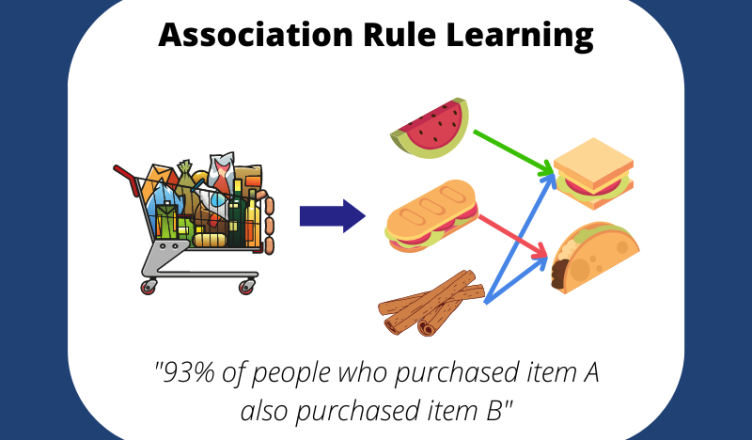

## Why do we use Association Rule Learning?

Well, the answer lies in the task this algorithm performs. Say, you are the owner of a Supermarket and you want people to buy your products easily. What you can do is, you can run this algorithm on your sales log and find interesting relations between the items. For example, you find out that people who purchase milk and bread, also tend to purchase butter. Thus you may want to do the following things to improve the quality of your mart:

You can place milk, bread and butter on the same shelf, so that buyers of one item would be prompted to buy another item.
You can put milk, bread and butter on discount to increase your item sales.
You can also target the buyers of milk or bread with the advertisement of butter.
Or you can also combine bread and butter into a whole new product i.e. buttery bread with slightly milky flavor and then put it on sale.

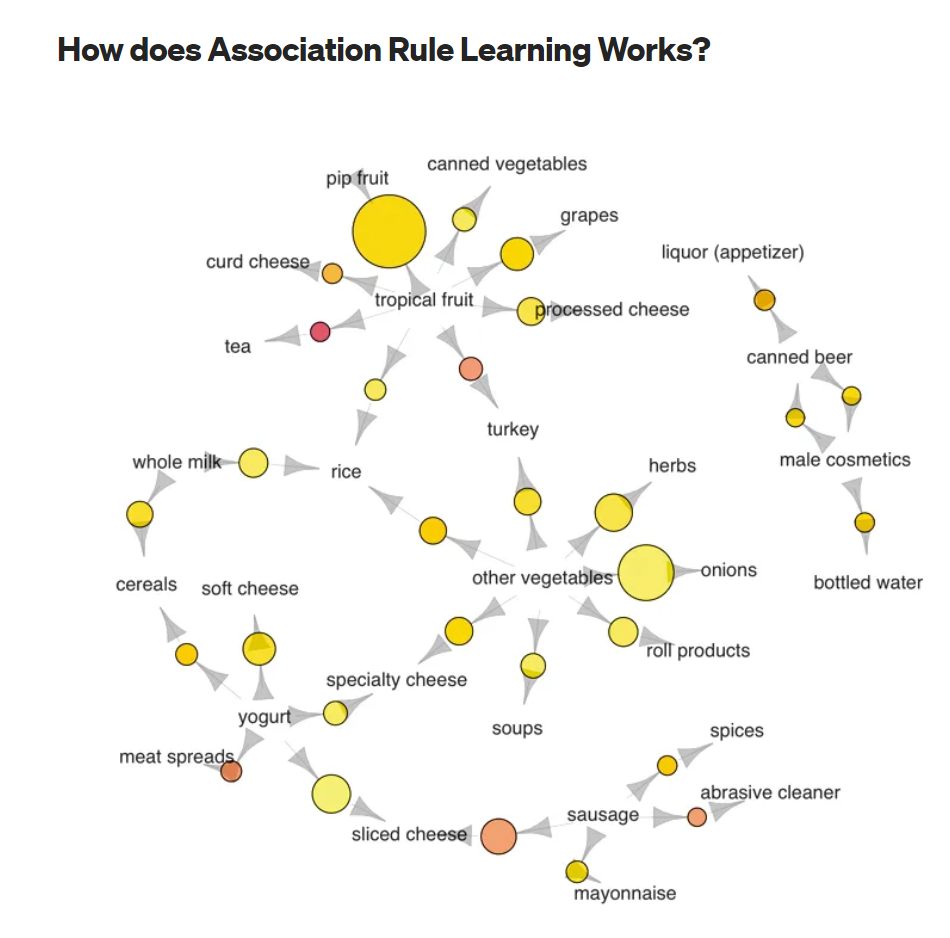

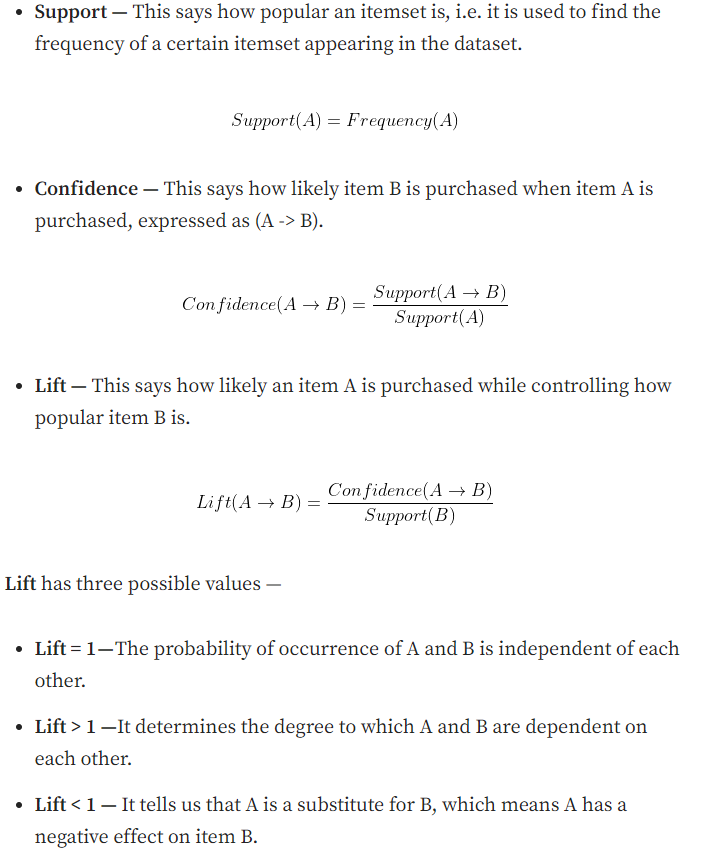

## Association Rule Learning can be divided into three algorithms —

Apriori— This algorithm uses frequent datasets to generate association rules. We apply an iterative approach or level-wise search where k-frequent itemsets are used to find k+1 itemsets. This algorithm uses a Breadth-First Search algorithm and Hash-Tree to calculate the itemset efficiently.

Eclat — Eclat algorithm stands for Equivalence Class Transformation. While the Apriori algorithm works in a horizontal sense imitating the Breadth-First Search of a graph, the ECLAT algorithm works in a vertical manner just like the Depth-First Search of a graph.. It performs faster execution than Apriori Algorithm.

F-P Growth— The F-P Growth algorithm stands for Frequent Pattern, and it is the improved version of the Apriori Algorithm. The FP-Growth Algorithm is an alternative way to find frequent item sets without using candidate generations, thus improving performance. It uses a Divide-and-Conquer strategy and the core of this method is the usage of a special data structure named Frequent-Pattern Tree (FP-tree), which retains the item set association information. The purpose of this frequent tree is to extract the most frequent patterns.

In [29]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('groceries.csv')

In [3]:
df.head(3)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(9835, 11)

In [5]:
market = []
for i in range (0, df.shape[0]):
    cus = []
    for j in df.columns:
        if type(df[j][i])==str:
            cus.append(df[j][i])
            
    market.append(cus)           

In [6]:
market

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [7]:
l = []
for i in market:
    for j in i:
        l.append(j)

In [8]:
l

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'yogurt',
 'cream cheese ',
 'meat spreads',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 'whole milk',
 'butter',
 'yogurt',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'other vegetables',
 'UHT-milk',
 'rolls/buns',
 'bottled beer',
 'liquor (appetizer)',
 'pot plants',
 'whole milk',
 'cereals',
 'tropical fruit',
 'other vegetables',
 'white bread',
 'bottled water',
 'chocolate',
 'citrus fruit',
 'tropical fruit',
 'whole milk',
 'butter',
 'curd',
 'yogurt',
 'flour',
 'bottled water',
 'dishes',
 'beef',
 'frankfurter',
 'rolls/buns',
 'soda',
 'chicken',
 'tropical fruit',
 'butter',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk',
 'pastry',
 'whole milk',
 'tropical fru

In [9]:
import collections

In [10]:
freq = collections.Counter(l)

In [11]:
freq.keys()

dict_keys(['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups', 'tropical fruit', 'yogurt', 'coffee', 'whole milk', 'pip fruit', 'cream cheese ', 'meat spreads', 'other vegetables', 'condensed milk', 'long life bakery product', 'butter', 'rice', 'abrasive cleaner', 'rolls/buns', 'UHT-milk', 'bottled beer', 'liquor (appetizer)', 'pot plants', 'cereals', 'white bread', 'bottled water', 'chocolate', 'curd', 'flour', 'dishes', 'beef', 'frankfurter', 'soda', 'chicken', 'sugar', 'fruit/vegetable juice', 'newspapers', 'packaged fruit/vegetables', 'specialty bar', 'butter milk', 'pastry', 'processed cheese', 'detergent', 'root vegetables', 'frozen dessert', 'sweet spreads', 'salty snack', 'waffles', 'candy', 'bathroom cleaner', 'canned beer', 'sausage', 'brown bread', 'shopping bags', 'beverages', 'hamburger meat', 'spices', 'hygiene articles', 'napkins', 'pork', 'berries', 'whipped/sour cream', 'artif. sweetener', 'grapes', 'dessert', 'zwieback', 'domestic eggs', 'spread cheese'

In [12]:
freq.values()

dict_values([814, 163, 550, 16, 1032, 1367, 535, 2513, 744, 382, 38, 1903, 101, 316, 544, 64, 25, 1787, 328, 752, 75, 148, 50, 401, 1041, 416, 521, 162, 161, 516, 580, 1634, 422, 318, 630, 717, 128, 241, 275, 854, 161, 158, 1072, 104, 81, 327, 333, 253, 23, 749, 924, 625, 876, 254, 327, 46, 266, 426, 567, 327, 702, 29, 220, 365, 67, 609, 109, 264, 238, 212, 256, 80, 157, 162, 255, 196, 73, 244, 462, 130, 121, 49, 173, 78, 32, 266, 77, 95, 52, 99, 269, 97, 305, 160, 184, 41, 85, 235, 137, 47, 97, 29, 43, 71, 163, 13, 46, 61, 112, 28, 18, 82, 64, 18, 80, 19, 8, 40, 48, 84, 254, 35, 106, 58, 26, 108, 90, 62, 41, 108, 8, 51, 60, 23, 11, 69, 94, 88, 6, 21, 28, 50, 27, 14, 26, 47, 6, 35, 29, 37, 44, 12, 33, 9, 22, 13, 7, 16, 20, 23, 4, 8, 11, 4, 19, 1, 2, 1])

In [13]:
d = {'Item Name' : freq.keys(),
    'Values' : freq.values()}

In [14]:
pd.DataFrame(d).sort_values(by = 'Values', ascending = False)

,Item Name,Values
7,whole milk,2513
11,other vegetables,1903
17,rolls/buns,1787
31,soda,1634
5,yogurt,1367
42,root vegetables,1072
24,bottled water,1041
4,tropical fruit,1032
50,sausage,924
52,shopping bags,876


In [15]:
!pip install mlxtend

In [16]:
# frequency pattern matrix

 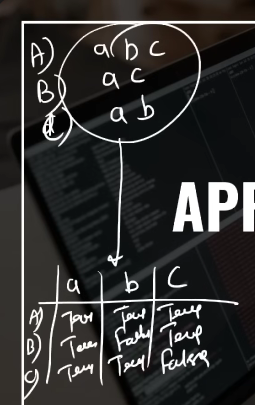

In [17]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

In [18]:
tr = TransactionEncoder()

In [19]:
tr.fit(market)

TransactionEncoder()

In [20]:
tr.transform(market)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
dataframe = pd.DataFrame(tr.transform(market), columns = tr.columns_)

In [22]:
dataframe

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
from mlxtend.frequent_patterns import apriori

In [24]:
apriori(dataframe, min_support = 0.05,use_colnames = True,max_len = 3).sort_values(by = 'support')

,support,itemsets
0,0.052466,(beef)
8,0.052974,(curd)
7,0.054398,(coffee)
28,0.054906,"(whole milk, rolls/buns)"
4,0.055313,(butter)
29,0.055618,"(whole milk, yogurt)"
12,0.055923,(margarine)
17,0.057651,(pork)
10,0.058973,(frankfurter)
9,0.061922,(domestic eggs)


whole milk + other veg

whole milk + yogurt

# FP Growth Algorithm

In [25]:
from mlxtend.frequent_patterns import fpgrowth

In [28]:
fpgrowth(dataframe,min_support = 0.05,use_colnames = True,max_len = 3).sort_values(by = 'support')

,support,itemsets
13,0.052466,(beef)
12,0.052974,(curd)
4,0.054398,(coffee)
29,0.054906,"(whole milk, rolls/buns)"
8,0.055313,(butter)
27,0.055618,"(whole milk, yogurt)"
1,0.055923,(margarine)
25,0.057651,(pork)
15,0.058973,(frankfurter)
26,0.061922,(domestic eggs)


### Applications of Association Rule Learning

Basket Data Analysis — It is one of the most popular examples of Association Rule Learning. Big retailers use this algorithm to determine association between items or what customers are looking for.

Web Usage Mining — Finding the hidden correlations is a powerful predictive tool to discover brand new security threats and network performance issues.

Medical Diagnosis — With the help of association rules, it will be alot easier to cure patients, as it helps in identifying the probability of illness for a particular disease.